# Data Wrangling - Step 2

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
from sklearn.cluster import KMeans
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
url ='C:\\Users\\Nader\\Desktop\\Coding Stuff\\Springboard\\Capstone\\Customer Segmentation - Capstone 2\\Customer Segmentation\\Mall_Customers.csv'
df = pd.read_csv(url)
df.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [2]:
df.describe()


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [3]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [4]:
df = df.rename(columns={'Annual Income (k$)':'Income', 'Spending Score (1-100)':'SpendingScore'})

In [5]:
Gender = df.sort_values('Gender')
Gender

,CustomerID,Gender,Age,Income,SpendingScore
69,70,Female,32,48,47
96,97,Female,47,60,47
160,161,Female,56,79,35
94,95,Female,32,60,42
93,94,Female,40,60,40
...,...,...,...,...,...
81,82,Male,38,54,55
80,81,Male,57,54,51
77,78,Male,40,54,48
138,139,Male,19,74,10


In [6]:
Age = df.sort_values('Age')
Age

,CustomerID,Gender,Age,Income,SpendingScore
114,115,Female,18,65,48
91,92,Male,18,59,41
65,66,Male,18,48,59
33,34,Male,18,33,92
0,1,Male,19,15,39
...,...,...,...,...,...
90,91,Female,68,59,55
108,109,Male,68,63,43
57,58,Male,69,44,46
70,71,Male,70,49,55


In [7]:
Income = df.sort_values('Income')
Income

,CustomerID,Gender,Age,Income,SpendingScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [8]:
Spending = df.sort_values('SpendingScore')
Spending

,CustomerID,Gender,Age,Income,SpendingScore
156,157,Male,37,78,1
158,159,Male,34,78,1
8,9,Male,64,19,3
32,33,Male,53,33,4
30,31,Male,60,30,4
...,...,...,...,...,...
167,168,Female,33,86,95
145,146,Male,28,77,97
185,186,Male,30,99,97
19,20,Female,35,23,98


# Exploratory Data Analysis - Step 3


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CustomerID     200 non-null    int64 
 1   Gender         200 non-null    object
 2   Age            200 non-null    int64 
 3   Income         200 non-null    int64 
 4   SpendingScore  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [10]:
df[df['Gender'] == 'Male'].mean()

CustomerID       104.238636
Age               39.806818
Income            62.227273
SpendingScore     48.511364
dtype: float64

In [11]:
df[df['Gender'] == 'Female'].mean()

CustomerID       97.562500
Age              38.098214
Income           59.250000
SpendingScore    51.526786
dtype: float64

<AxesSubplot:ylabel='Gender'>

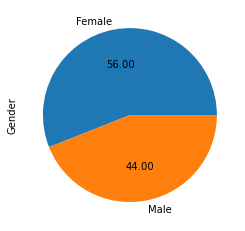

In [12]:
df['Gender'].value_counts().plot(kind='pie', autopct='%.2f')

C:\Users\Nader\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Income', ylabel='Density'>

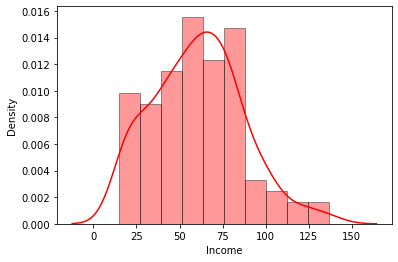

In [13]:
plt.rcParams["patch.force_edgecolor"] = True
sns.distplot(df.Income, color='red')

C:\Users\Nader\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SpendingScore', ylabel='Density'>

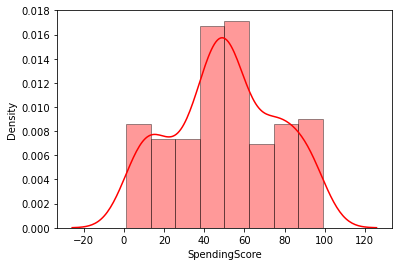

In [14]:
sns.distplot(df.SpendingScore, color='red')

(array([16., 20., 10., 17., 35., 37., 11., 24., 14., 16.]),
 array([ 1. , 10.8, 20.6, 30.4, 40.2, 50. , 59.8, 69.6, 79.4, 89.2, 99. ]),
 <BarContainer object of 10 artists>)

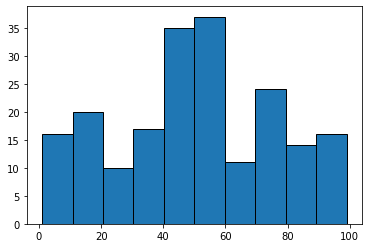

In [15]:
plt.hist(df.SpendingScore)

<AxesSubplot:xlabel='Gender', ylabel='SpendingScore'>

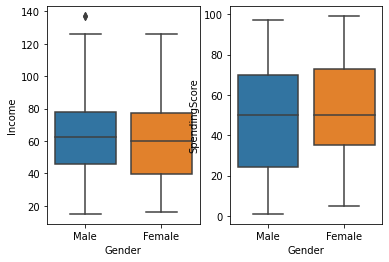

In [16]:
plt.subplot(1,2,1)
sns.boxplot(x=df.Gender, y=df.Income)
plt.subplot(1,2,2)
sns.boxplot(x=df.Gender, y=df.SpendingScore)

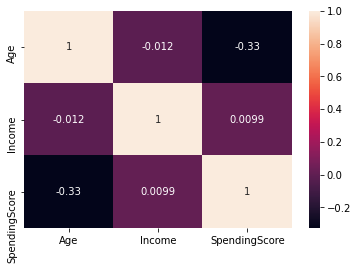

In [17]:
scatter_var = list(set(df.columns)-set(['CustomerID']))
corr_matrix = df[scatter_var].corr()
sns.heatmap(corr_matrix,annot=True);

In [18]:
EDA_report = ProfileReport(df)
EDA_report.to_file(output_file='EDA.html')

# Pre-Processing & Training

In [19]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Income', 'SpendingScore'], dtype='object')

In [20]:
x = df.drop(['CustomerID', 'SpendingScore', 'Gender'], axis=1)

In [21]:
y = df[['SpendingScore']]

In [22]:
x

,Age,Income
0,19,15
1,21,15
2,20,16
3,23,16
4,31,17
...,...,...
195,35,120
196,45,126
197,32,126
198,32,137


In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=123)

In [24]:
scaler = preprocessing.StandardScaler().fit(x_train)

In [25]:
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Modeling - Logistic Regression

In [26]:
# Predict spending score based on Age and Income
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

c_params = [0.001, 0.01, 0.1, 1, 10, 100]

table = pd.DataFrame(columns = ['C_parameter', 'Accuracy'])
table['C_parameter'] = c_params

In [27]:
j = 0
for i in c_params:
    logreg = LogisticRegression(C = i, random_state=40)
    logreg.fit(x_train, y_train)
    
    y_pred = logreg.predict(x_test)
    
    table.iloc[j,1] = accuracy_score(y_test,y_pred)
    j += 1
    
table

C:\Users\Nader\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Nader\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Nader\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  r

,C_parameter,Accuracy
0,0.001,0
1,0.010,0.04
2,0.100,0.02
3,1.000,0
4,10.000,0
5,100.000,0


In [28]:
cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_matrix

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

# KNN

In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import plot_roc_curve

In [30]:
knn = KNeighborsClassifier(p=2, weights ='distance', n_neighbors = 5)
knn.fit(x_train, y_train)

<ipython-input-30-e65b1babce45>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(x_train, y_train)


KNeighborsClassifier(weights='distance')

In [31]:
y_predict = knn.predict(x_test)
cnf_mat = confusion_matrix(y_test, y_predict)
cnf_mat

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [32]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         2
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         0
          17       0.00      0.00      0.00         1
          20       0.00      0.00      0.00         2
          22       0.00      0.00      0.00         0
          23       0.00      0.00      0.00         0
          27       0.00      0.00      0.00         0
          32       0.00      0.00      0.00         2
          35       0.33      1.00      0.50         1
          39       0.00    

C:\Users\Nader\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nader\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [33]:
df = df.drop('Gender', axis=1)
df

,CustomerID,Age,Income,SpendingScore
0,1,19,15,39
1,2,21,15,81
2,3,20,16,6
3,4,23,16,77
4,5,31,17,40
...,...,...,...,...
195,196,35,120,79
196,197,45,126,28
197,198,32,126,74
198,199,32,137,18


# K-Means Clustering

Text(0, 0.5, 'WC')

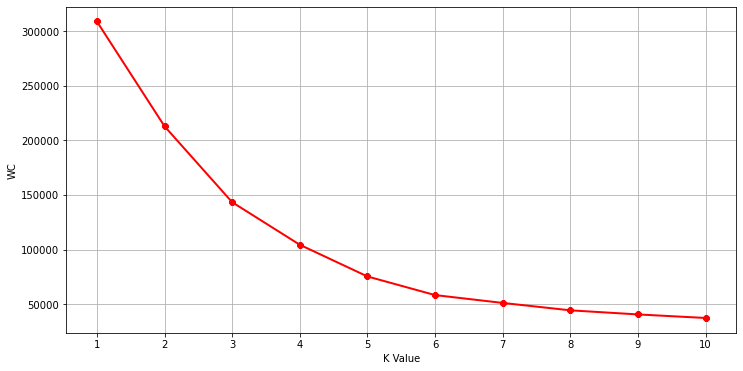

In [34]:
from sklearn.cluster import KMeans
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(df.iloc[:,1:])
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color='red', marker ='8')
plt.xlabel('K Value')
plt.xticks(np.arange(1,11,1))
plt.ylabel('WC')
                    
# Elbow comes in at 5, therefore the optimal K-value is found to be 5

In [35]:
from pandas import DataFrame
df = DataFrame(df,columns=['SpendingScore','Income'])

[[17.11428571 88.2       ]
 [82.12820513 86.53846154]
 [49.51851852 55.2962963 ]
 [79.36363636 25.72727273]
 [20.91304348 26.30434783]]


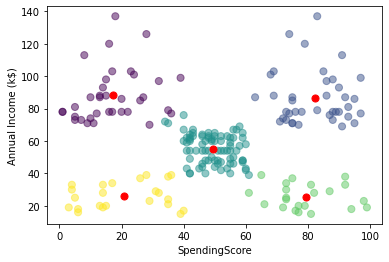

In [36]:
kmeans = KMeans(n_clusters=5).fit(df)
centroids = kmeans.cluster_centers_
print(centroids)

plt.scatter(df['SpendingScore'], df['Income'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.xlabel("SpendingScore")
plt.ylabel("Annual Income (k$)")
plt.show()

In [37]:
# split into 5 clusters with the following categories
# 1) Low Spending Score, Low Income
# 2) Low Spending Score, High Income
# 3) Average Spending Score, Average Income
# 4) High Spending Score, Low Income
# 5) High Spending Score, High Income

# Gaussian Mixture

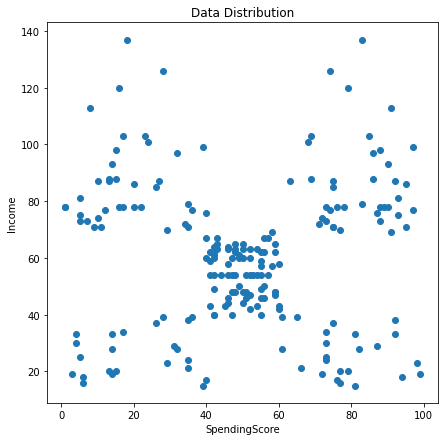

In [38]:
plt.figure(figsize=(7,7))
plt.scatter(df["SpendingScore"],df["Income"])
plt.xlabel('SpendingScore')
plt.ylabel('Income')
plt.title('Data Distribution')
plt.show()

In [41]:
from pandas import DataFrame
from sklearn.mixture import GaussianMixture
df = DataFrame(df,columns=['SpendingScore','Income'])

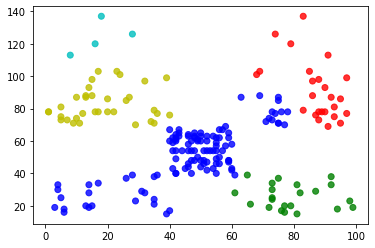

In [42]:
gmm = GaussianMixture(n_components=5, random_state=6)
gmm.fit(df)

colors = ['r' if i==0 else 'b' if i==1 else 'g' if i==2 else 'c' if i ==3 else 'y' for i in gmm.predict(df)]
ax = plt.gca()
ax.scatter(df['SpendingScore'], df['Income'], c=colors, alpha=0.8)
plt.show()